In [1]:
import pandas as pd
import numpy as np
from numpy import abs
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
sal=pd.read_csv('MNC_salaries.csv')
sal

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,41,PF,20,06-Oct,234,Kentucky,2239800.0
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,07-Mar,256,NaN,2900000.0


In [3]:
print(sal['College'].mode())
sal['Salary'].fillna(sal['Salary'].mean(),inplace=True)
sal['College'].fillna('Kentucky',inplace=True)

0    Kentucky
dtype: object


In [4]:
print(sal['Salary'])
sal['College']

0      7.730337e+06
1      6.796117e+06
2      4.842684e+06
3      1.148640e+06
4      5.000000e+06
           ...     
452    2.239800e+06
453    2.433333e+06
454    9.000000e+05
455    2.900000e+06
456    9.472760e+05
Name: Salary, Length: 457, dtype: float64


0                  Texas
1              Marquette
2      Boston University
3          Georgia State
4               Kentucky
             ...        
452             Kentucky
453               Butler
454             Kentucky
455             Kentucky
456               Kansas
Name: College, Length: 457, dtype: object

In [5]:
sal.describe()

,Number,Age,Weight,Salary
count,457.000000,457.000000,457.000000,4.570000e+02
mean,17.678337,26.938731,221.522976,4.842684e+06
std,15.966090,4.404016,26.368343,5.165781e+06
min,0.000000,19.000000,161.000000,3.088800e+04
25%,5.000000,24.000000,200.000000,1.100602e+06
50%,13.000000,26.000000,220.000000,2.869440e+06
75%,25.000000,30.000000,240.000000,6.331404e+06
max,99.000000,40.000000,307.000000,2.500000e+07


In [6]:
sal_dt=sal.drop(columns=['Name','Height'],axis=1)
sal_dt

,Team,Number,Position,Age,Weight,College,Salary
0,Boston Celtics,0,PG,25,180,Texas,7.730337e+06
1,Boston Celtics,99,SF,25,235,Marquette,6.796117e+06
2,Boston Celtics,30,SG,27,205,Boston University,4.842684e+06
3,Boston Celtics,28,SG,22,185,Georgia State,1.148640e+06
4,Boston Celtics,8,PF,29,231,Kentucky,5.000000e+06
...,...,...,...,...,...,...,...
452,Utah Jazz,41,PF,20,234,Kentucky,2.239800e+06
453,Utah Jazz,8,PG,26,203,Butler,2.433333e+06
454,Utah Jazz,25,PG,24,179,Kentucky,9.000000e+05
455,Utah Jazz,21,C,26,256,Kentucky,2.900000e+06


In [7]:
p=sal_dt.iloc[:,:1]
q=sal_dt.iloc[:,2:3]
r=sal_dt.iloc[:,5:6]
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
sal_dt['Team']=le.fit_transform(p)
sal_dt['Position']=le.fit_transform(q)
sal_dt['College']=le.fit_transform(r)

In [18]:
sal_dt

,Team,Number,Position,Age,Weight,College,Salary
0,1,0,2,25,180,93,7.730337e+06
1,1,99,3,25,235,52,6.796117e+06
2,1,30,4,27,205,8,4.842684e+06
3,1,28,4,22,185,33,1.148640e+06
4,1,8,1,29,231,45,5.000000e+06
...,...,...,...,...,...,...,...
452,28,41,1,20,234,45,2.239800e+06
453,28,8,2,26,203,11,2.433333e+06
454,28,25,2,24,179,45,9.000000e+05
455,28,21,0,26,256,45,2.900000e+06


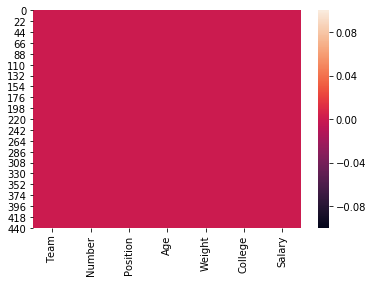

In [19]:
import seaborn as sns
sns.heatmap(sal_dt.isnull())

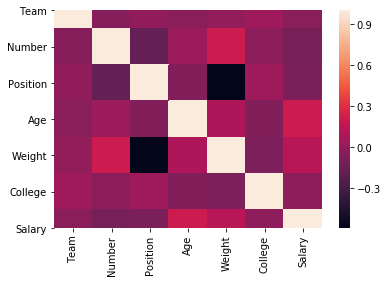

In [20]:
sns.heatmap(sal_dt.corr())

In [21]:
sal_dt.skew()

Team       -0.007368
Number      1.668386
Position   -0.014795
Age         0.626349
Weight      0.113788
College     0.261126
Salary      1.595511
dtype: float64

In [22]:
from scipy.stats import zscore
sal_d=abs(zscore(sal_dt))
print(sal_d.shape)
sal_new=sal_dt.loc[(sal_d<3).all(axis=1)]
sal_new.shape

(457, 7)


(443, 7)

In [23]:
sal_new.skew()

Team       -0.014442
Number      0.801953
Position   -0.032205
Age         0.654542
Weight      0.092816
College     0.239960
Salary      1.501286
dtype: float64

In [24]:
l=['Team','Position','Age','Weight','College','Salary']
for i in l:
        if sal_new.skew().loc[i]>0.5:
            sal_new[i]=np.log(sal_new[i])

In [25]:
sal_new.skew()

Team       -0.014442
Number      0.801953
Position   -0.032205
Age         0.294647
Weight      0.092816
College     0.239960
Salary     -0.482399
dtype: float64

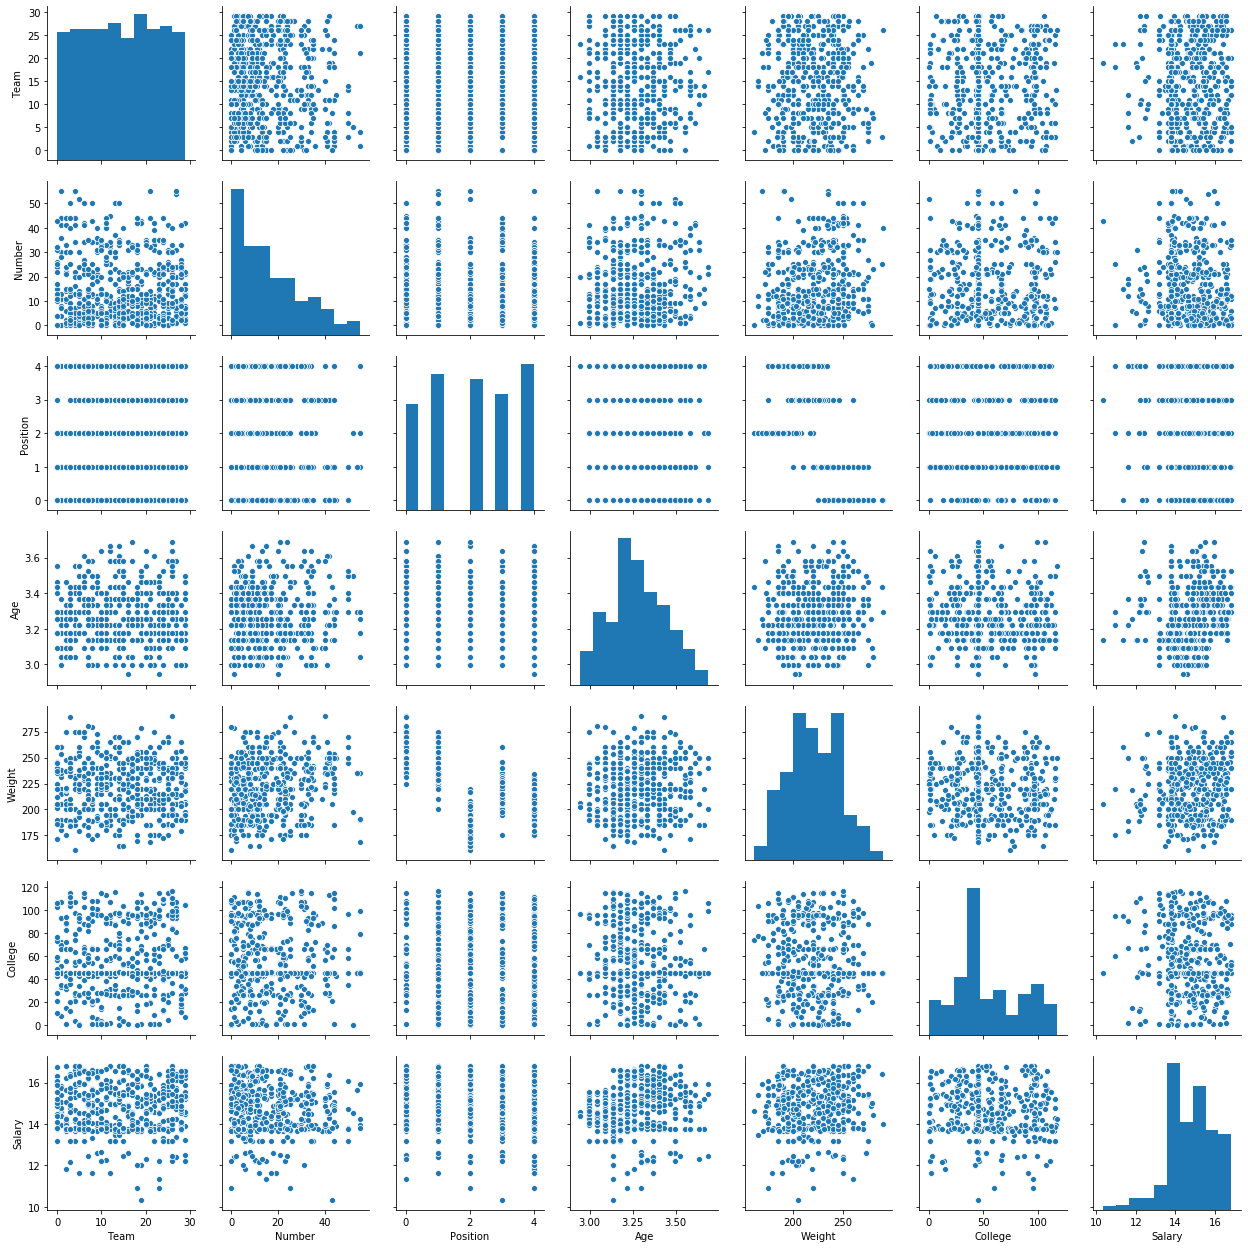

In [26]:
sns.pairplot(sal_new)

In [33]:
x=sal_new.drop(columns=['Number','Salary'])
y=sal_new['Salary']
print(x.shape)
print(y.shape)


(443, 5)
(443,)


In [34]:
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score
max_score=0

for r in range(45,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r,test_size=0.2)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    ypred=lr.predict(x_test)
    rsc=r2_score(y_test,ypred)
    if rsc>max_score:
        max_score=rsc
        final_state=r
print('the max_score',max_score ,'is for the final state',r)



the max_score 0.10146631985305132 is for the final state 99


In [35]:
from sklearn.model_selection import cross_val_score
cross_val_score(lr,x,y,cv=5).mean()

0.012823690256474696

In [40]:
max_score=0
for r in range(45,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r,test_size=0.2)
    dc=DecisionTreeRegressor()
    dc.fit(x_train,y_train)
    ypred=dc.predict(x_test)
    rsc=r2_score(y_test,ypred)
    if rsc>max_score:
        max_score=rsc
        final_state=r
print('the max_score',max_score ,'is for the final state',r)

cross_val_score(dc,x,y,cv=5).mean()

the max_score 0 is for the final state 99


-1.009929644111161

In [41]:
max_score=0
for r in range(45,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r,test_size=0.2)
    kn=KNeighborsRegressor()
    kn.fit(x_train,y_train)
    ypred=kn.predict(x_test)
    rsc=r2_score(y_test,ypred)
    if rsc>max_score:
        max_score=rsc
        final_state=r
print('the max_score',max_score ,'is for the final state',r)

cross_val_score(kn,x,y,cv=5).mean()

the max_score 0.05619660287307493 is for the final state 99


-0.15621749133548102

In [51]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
ls=Lasso()
parameters={'alpha':[0.001,0.01,0.1,1]}
clf=GridSearchCV(ls,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.001}

In [44]:
ls=Lasso(alpha=0.001)


print('cors_val_score mean:',cross_val_score(ls,x,y,cv=5).mean())
print('cors_val_score std:',cross_val_score(ls,x,y,cv=5).std())

cors_val_score mean: 0.012991965871772893
cors_val_score std: 0.031666966381533254


In [45]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
parameters={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,100,500,1000]}
clf=GridSearchCV(gbr,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.001, 'n_estimators': 1000}

In [46]:
gbr=GradientBoostingRegressor(learning_rate=0.01,n_estimators=100)
print('cors_val_score mean:',cross_val_score(gbr,x,y,cv=5).mean())
print('cors_val_score std:',cross_val_score(gbr,x,y,cv=5).std())

cors_val_score mean: 0.0065552431688512105
cors_val_score std: 0.06283416900732576


In [48]:
from sklearn.ensemble import AdaBoostRegressor
adb=AdaBoostRegressor()
parameters={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,100,500,1000]}
clf=GridSearchCV(adb,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.001, 'n_estimators': 500}

In [49]:
adb=AdaBoostRegressor(learning_rate=0.001,n_estimators=500)
print('cors_val_score mean:',cross_val_score(adb,x,y,cv=5).mean())
print('cors_val_score std:',cross_val_score(adb,x,y,cv=5).std())

cors_val_score mean: 0.02496044349673556
cors_val_score std: 0.054048399575749376


In [50]:
from sklearn.externals import joblib
joblib.dump(adb,'salary.pk1')

['salary.pk1']